# **Taller 1 - Transformaciones Básicas en Computación Visual**

**Juan Daniel Ramírez Mojica**

In [1]:
# Importar librerías necesarias para la animación y visualización

import numpy as np                            # Para operaciones matemáticas y manejo de matrices (transformaciones, coordenadas, etc.)
import matplotlib.pyplot as plt               # Para graficar los frames y guardar imágenes de las figuras transformadas.
import imageio                                # Para crear el GIF de los frames.
import os                                     # Para crear carpeta donde guardo los frames.
from IPython.display import Image, display    # Para mostrar el GIF directamente dentro de un notebook.


<ipython-input-2-db53a588bf58>:164: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


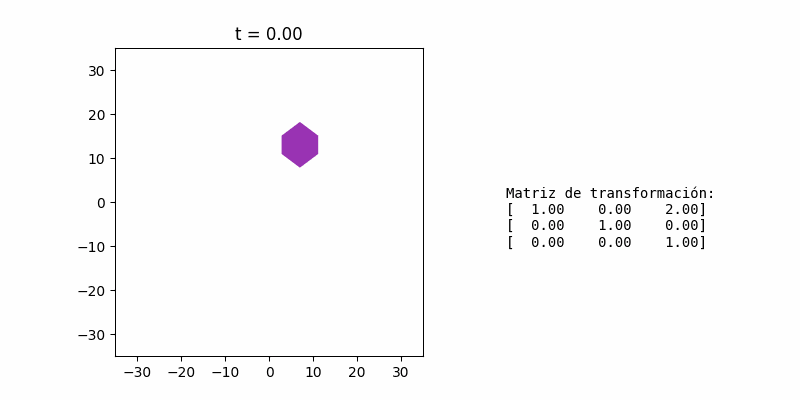

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [2]:

# Crear carpeta temporal para guardar los frames de la animación
frames_dir = "frames"
os.makedirs(frames_dir, exist_ok=True)


#Hexagono representado como una matriz 2xN (2 filas: x, y)
hexagono = np.array([
    [0.5, 1.8],   # Punto 1
    [0.9, 1.5],   # Punto 2
    [0.9, 1.1],   # Punto 3
    [0.5, 0.8],   # Punto 4
    [0.1, 1.1],   # Punto 5
    [0.1, 1.5],   # Punto 6
    [0.5, 1.8]    # Repetimos el punto 1 para cerrar el hexagono
    ]).T * 10     # Transpuesta para que quede como matriz 2xN.
                  #Se multiplcica X10 para que se ve más grande.



# Guardamos una posición base para la Fase 2 (se calcula solo una vez)
fase2_offset = np.array([2 * np.cos(4 / 2), 2 * np.sin(4 / 2)])  # Posición final de Fase 1 que es en los 4 segundos



def get_transformation_matrix(t):

    if t < 4:
        # Fase 1: Movimiento circular, rotación suave, escalamiento
        scale = 1 + 0.5 * np.sin(t)   # La figura se expande y contrae, como si palpitara.
        angle = t                     #El ángulo depende del tiempo. Va creciendo.

        #Esto mueve el centro de la figura en un círculo de radio 2, a la mitad de velocidad(t/2):
        tx = 2 * np.cos(t / 2)
        ty = 2 * np.sin(t / 2)

    else:

        # Fase 2: va más rapido,

        count = 0 #Contador para obtener la última posición de Fase 1:
        if count == 0:
            tx = 2 * np.cos(4 / 2)
            ty = 2 * np.sin(4 / 2)
            count += 1


        scale = 1 + 0.2 * (t - 4)  # -4 para que la escala siga continua desde Fase 1
        angle = 2 * (t - 4) + 4    # +4 para que la rotación siga continua desde Fase 1
        tx, ty = fase2_offset      # mantener la posición final de Fase 1




    # Matriz de Escala (S)
    # Esta matriz escala la figura en el eje X y Y por factor (scale)
    S = np.array([
        [scale, 0, 0],
        [0, scale, 0],
        [0, 0, 1]
    ])


    # Matriz de Rotación (R)
    # rota la figura alrededor del origen (0, 0).
    R = np.array([
        [np.cos(angle), -np.sin(angle), 0],  #Calcula la nueva coordenada X del punto rotado, -sin porque es sentido contrareloj.
        [np.sin(angle),  np.cos(angle), 0],  #Calcula la nueva coordenada Y del punto rotado.
        [0, 0, 1]
    ])

    # Matriz de Traslación (T)
    T = np.array([
        [1, 0, tx],
        [0, 1, ty],
        [0, 0, 1]
    ])

    return T @ R @ S
    # Orden: primero escalar, luego rotar, luego trasladar



# Función para ir cambiando el color de la figura.
# Se usa SIN para que sea una transicion suave.
def get_color(t):
    r = 0.6 + 0.4 * np.sin(t)
    g = 0.2
    b = 0.4 + 0.3 * np.cos(t)
    return tuple(np.clip([r, g, b], 0.0, 1.0))
    #Este return asegura que los valores nunca salgan del rango válido (0-1)


# Lista para guardar los nombres de los frames
filenames = []



# Generar 45 frames para la animación
for frame in range(45):
    t = frame * 0.2
    M = get_transformation_matrix(t)  # Matriz de transformación

    # Mostrar la matriz de transformación:
    # Lo dejo comentado porque no es necesario, ya lo tengo en el gif
    #print(f"\n Frame {frame}, t = {t:.2f}")
    #print("Matriz de transformación:\n", M)

    # Convertir el hexagono a coordenadas homogéneas 3xN (agregamos fila de unos)
    hexagono_h = np.vstack((hexagono, np.ones((1, hexagono.shape[1]))))

    # Aplicar la transformación
    transformed = M @ hexagono_h


    # Obtener el color en función del tiempo
    color = get_color(t)



    # Dibujar el hexagono
    # Crear figura con 2 columnas: 1 para el gráfico, 1 para la matriz
    fig, axs = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw={'width_ratios': [3, 2]})

    # Gráfico
    axs[0].fill(transformed[0], transformed[1], color=color, edgecolor=color)
    axs[0].set_title(f"t = {t:.2f}")
    axs[0].set_xlim(-35, 35)
    axs[0].set_ylim(-35, 35)
    axs[0].grid(False)
    axs[0].set_aspect('equal')


    # Mostrar la matriz transformada
    matrix_text = '\n'.join([
        f"[{M[0,0]:6.2f}  {M[0,1]:6.2f}  {M[0,2]:6.2f}]",
        f"[{M[1,0]:6.2f}  {M[1,1]:6.2f}  {M[1,2]:6.2f}]",
        f"[{M[2,0]:6.2f}  {M[2,1]:6.2f}  {M[2,2]:6.2f}]"
    ])


    # Texto o a mostrar
    texto_matrices = (
        "\n\nMatriz de transformación:\n" + matrix_text
    )

    axs[1].text(0.05, 0.5, texto_matrices,
                fontsize=10, va='center', ha='left', family='monospace')
    axs[1].axis('off')



    # Guardar el frame como imagen
    name = f"{frames_dir}/frame_{frame:03d}.png"
    plt.savefig(name)
    filenames.append(name)
    plt.close()



#Crear el GIF con los frames
gif_path = " Taller1_TransformacionesBásicas_juaramirezmo.gif"
with imageio.get_writer(gif_path, mode='I', duration=0.1) as writer:  #I--> secuencia de imágenes
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

# Mostrar la animación
display(Image(filename=gif_path))

#Descargar gif
try:
    from google.colab import files
    files.download(gif_path)
except:
    print("Algo falló")
